## <font color='red'>pandas 抓取股票数据</font>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

## 以桐昆股份 601233
- 沪A .SS
- 深A .SZ

In [8]:
df_datacsv = web.DataReader("601233.SS","yahoo",datetime.datetime(2018,1,1),datetime.date.today())

In [9]:
df_datacsv[:5]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,17.671400,16.214300,16.214300,17.671400,57186488.0,17.571602
2018-01-03,17.885700,17.378599,17.492901,17.578600,41095849.0,17.479324
2018-01-04,19.142900,17.864300,17.864300,18.871401,52611597.0,18.764826
2018-01-05,19.371401,18.357100,18.592899,19.092899,35511195.0,18.985073
2018-01-08,20.285700,18.571400,18.571400,20.164301,34920065.0,20.050423


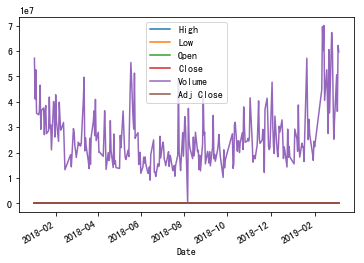

In [10]:
df_datacsv.plot()

## <font color="red">去掉交易量，只保留开盘、收盘、最高、最低

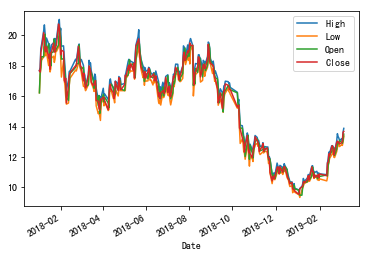

In [17]:
df_datacsv.columns
df_plot = df_datacsv.drop(['Volume','Adj Close'],axis=1)
df_plot.plot()

In [38]:
train = df_datacsv[['High','Low','Open','Close','Volume']][0:-1]
train[:5]

,High,Low,Open,Close
Date,,,,
2018-01-02,17.671400,16.214300,16.214300,17.671400
2018-01-03,17.885700,17.378599,17.492901,17.578600
2018-01-04,19.142900,17.864300,17.864300,18.871401
2018-01-05,19.371401,18.357100,18.592899,19.092899
2018-01-08,20.285700,18.571400,18.571400,20.164301


In [39]:
target = df_datacsv.High[1:]

In [40]:
len(target),len(train)

(284, 284)

In [42]:
## 用最大值、最小值、开盘价、收盘价 
## 预测第二天的最大值
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC

# <font color='red'>用线性回归预测</font> 

0.7407946330714363


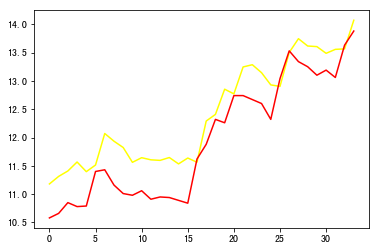

In [103]:
lasso = linear_model.Lasso()
lasso.fit(train[:250],target.values[0:250])
scores = lasso.score(train[250:],target.values[250:])
print(scores)
predict_y = lasso.predict(train[250:])
plt.plot(predict_y,color="yellow",label='预测')
plt.plot(target.values[250:],color='red',label='真实')
plt.show()